In [2]:
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from pickle import dump, load
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Prepare image and label data 

In [3]:
img_height = 50
img_width = 200

<b>Objective of this function:</b>
   - read the images in gray scale
   - resize the image
   - store image data
   - prepare labels in the form individual list inside another list

In [4]:
file_path = 'C:/Users/hibat/Desktop/Github/CAPTCHA/samples'
def prepare_images(file_path):
    #collect image_data
    image_data = []
    
    #collect label letters in the form of list
    label_data = []
    
    #Unique characters in the captcha
    Vocab = []
    count = 0
    for image in os.listdir(file_path):
        if count <= 5999:
            try:
            #read image
                image_array = cv2.imread(os.path.join(file_path, image), cv2.IMREAD_GRAYSCALE)
            #resize image
                new_array = cv2.resize(image_array, (img_width, img_height))/255
                new_array = np.transpose(new_array)
                
            #label name
                file_name = image[:-4]
                print(file_name)
                image_data.append(new_array)
            
            #create list of letters for individual captcha
                list_of_words = []
                for letter in file_name:
                    list_of_words.append(letter)
                    if letter not in Vocab:
                        Vocab.append(letter)
                
        
                label_data.append(list_of_words)
                count += 1
            except:
                pass
    return np.array(image_data), label_data, Vocab

In [5]:
image_data, label_data, Vocab = prepare_images(file_path)

226md
22d5n
2356g
23mdg
23n88
243mm
244e2
245y5
24f6w
24pew
25257
253dc
25egp
25m6p
25p2m
25w53
264m5
268g2
28348
28x47
2b827
2bg48
2cegf
2cg58
2cgyx
2en7g
2enf4
2fxgd
2g783
2g7nm
2gyb6
2mg87
2mpnn
2n73f
2nbc5
2nbcx
2nf26
2npg6
2nx38
2p2y8
2pfpn
2w4y7
2wc38
2wx73
2x7bm
2xc2n
2ycn8
2yggg
325fb
32cnn
32dnn
33b22
33f7m
33n73
33ng4
33p4e
34b84
34fxm
34pcn
368y5
36bc2
36nx4
36w25
373gb
377xx
378e5
37d52
37ep6
387g2
38n57
3b4we
3bd8f
3bfnd
3bnyf
3bx86
3c7de
3cpwb
3d7bd
3den6
3dgmf
3ebnn
3ebpw
3eny7
3fbxd
3g2w6
3mxdn
3n2b4
3n3cf
3n7mx
3ndxd
3nfdn
3nnpw
3nw7w
3ny45
3p4nn
3p67n
3pe4g
3w2bw
3wnd3
3x325
3x5fm
3xcgg
3xng6
3ye2e
3ygde
3ym7f
428b6
42dw4
42nxy
42xpy
43gey
43mn5
43p5d
43xfe
4433m
445cc
44c22
44fyb
44xe8
44ype
467d5
46mbm
4743p
474ff
478nx
47e4p
47m2b
488de
4b2pw
4c8n8
4cfw8
4cn7b
4d22m
4dgf7
4dw3w
4egem
4exnn
4f8yp
4fc36
4fp5g
4gb3f
4gycb
4m2w5
4n2yg
4n3mn
4nc37
4nnf3
4w6mw
4w76g
4yc85
4ycex
4ynf3
52447
5325m
537nf
53mn8
53wb8
53wp3
556wd
55w5c
55y2m
56c34
56m6y
56ncx
573bn
573d8
574d

<b>Objective of this function:</b>
  - assign integers to char using vocab and return final label

In [6]:
def prepare_label_data(Vocab, label_data):
    # Mapping characters to integers
    char_to_num = layers.experimental.preprocessing.StringLookup(
    vocabulary= Vocab, num_oov_indices=0, mask_token=None)
    
    final_label = []
    for data in label_data:
        label_1 = char_to_num(tf.strings.unicode_split(data, input_encoding="UTF-8"))
        label = label_1.to_list()
        final_label.append(np.array(label))
    return np.array(final_label)

In [7]:
final_label = prepare_label_data(Vocab, label_data)

In [8]:
#length of data
print(len(image_data))
print(len(final_label))

1070
1070


In [9]:
#save prepared data
prepared_image_data = dump(image_data, open('image_data.pkl', 'wb'))
prepared_label_data = dump(final_label, open('label_data.pkl', 'wb'))

In [10]:
#load data
load_image_data = load(open('image_data.pkl', 'rb'))
load_label_data = load(open('label_data.pkl', 'rb'))

- Prepare training and validation dataset
- traning data = (x_train, y_train)
- use tf, from generate function to combine x_train and y_train

In [11]:
#modeify label data, image data
label = []
image_data = np.reshape(load_image_data, (len(image_data), img_width, img_height, 1))

for i in load_label_data:
    flat_list = [item for sublist in i for item in sublist]
    label.append(flat_list)

final_label = np.array(label)
Label = np.reshape(final_label, (final_label.shape[0], final_label.shape[1]))


In [12]:
#split data into training and validation
x_train, x_valid, y_train, y_valid = train_test_split(image_data, Label, test_size=0.3, random_state=42)

In [13]:
x_train[0].shape

(200, 50, 1)

- used tf.data API to call the inputs
- It is important not to write tf.data.Dataset.from_tensor_slices((x_train, y_train))
- Because it required specific names tf.data.Dataset.from_tensor_slices({"image": x_train, "label": y_train})

In [14]:
train_dataset = tf.data.Dataset.from_tensor_slices({"image": x_train, "label": y_train}).batch(16).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
validation_dataset = tf.data.Dataset.from_tensor_slices({"image": x_valid, "label": y_valid}).batch(16).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [15]:
# Mapping characters to integers
char_to_num = layers.experimental.preprocessing.StringLookup(
    vocabulary=Vocab, num_oov_indices=0, mask_token=None
)



num_to_char = layers.experimental.preprocessing.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), mask_token=None, invert=True
)

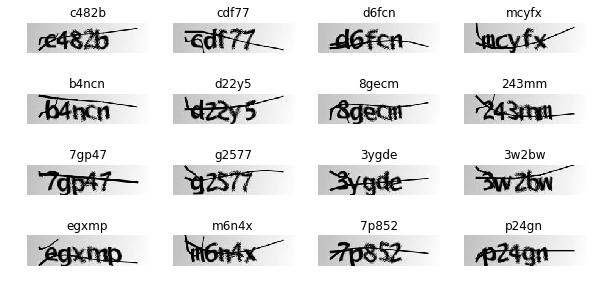

In [16]:
_, ax = plt.subplots(4, 4, figsize=(10, 5))
for batch in train_dataset.take(1):
    images = batch["image"]
    labels = batch["label"]
    for i in range(16):
        img = (images[i] * 255).numpy().astype("uint8")
       
        label = tf.strings.reduce_join(num_to_char(labels[i])).numpy().decode("utf-8")
        ax[i // 4, i % 4].imshow(img[:, :, 0].T, cmap="gray")
        ax[i // 4, i % 4].set_title(label)
        ax[i // 4, i % 4].axis("off")
plt.show()

# CRNN model

![title](OCR.png)


In [17]:
class CTCLayer(layers.Layer):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred):
        # Compute the training-time loss value and add it
        # to the layer using `self.add_loss()`.
        batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
        input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
        label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

        input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        self.add_loss(loss)

        # At test time, just return the computed predictions
        return y_pred

In [18]:
def build_model():
    # Inputs to the model
    input_img = layers.Input(shape=(img_width, img_height, 1), name="image", dtype="float32")
    labels = layers.Input(name="label", shape=(None,), dtype="float32")

    # First conv block
    x = layers.Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same",name="Conv1")(input_img)
    x = layers.MaxPooling2D((2, 2), name="pool1")(x)

    # Second conv block
    x = layers.Conv2D(64,(3, 3),activation="relu",kernel_initializer="he_normal",padding="same",name="Conv2")(x)
    x = layers.MaxPooling2D((2, 2), name="pool2")(x)

    # We have used two max pool with pool size and strides 2.
    # Hence, downsampled feature maps are 4x smaller. The number of
    # filters in the last layer is 64. Reshape accordingly before
    # passing the output to the RNN part of the model
    new_shape = ((img_width // 4), (img_height // 4) * 64)
    x = layers.Reshape(target_shape=new_shape, name="reshape")(x)
    x = layers.Dense(64, activation="relu", name="dense1")(x)
    x = layers.Dropout(0.2)(x)

    # RNNs
    #x = layers.Bidirectional(layers.LSTM(256, return_sequences=True, dropout=0.25))(x)
    x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.25))(x)
    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True, dropout=0.25))(x)
    #recently added
    #x = layers.Bidirectional(layers.LSTM(32, return_sequences=True, dropout=0.25))(x)
    # Output layer
    x = layers.Dense(len(Vocab) + 1, activation="softmax", name="dense2")(x)

    # Add CTC layer for calculating CTC loss at each step
    output = CTCLayer(name="ctc_loss")(labels, x)

    # Define the model
    model = keras.models.Model(inputs=[input_img, labels], outputs=output, name="ocr_model_v1")
    # Optimizer
    opt = keras.optimizers.Adam()
    #opt = keras.optimizers.RMSprop()
    # Compile the model and return
    model.compile(optimizer=opt)
    return model



In [19]:
model = build_model()
model.summary()

Model: "ocr_model_v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
image (InputLayer)              [(None, 200, 50, 1)] 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 200, 50, 32)  320         image[0][0]                      
__________________________________________________________________________________________________
pool1 (MaxPooling2D)            (None, 100, 25, 32)  0           Conv1[0][0]                      
__________________________________________________________________________________________________
Conv2 (Conv2D)                  (None, 100, 25, 64)  18496       pool1[0][0]                      
_______________________________________________________________________________________

In [20]:
epochs = 50
early_stopping_patience = 30
# Add early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=early_stopping_patience, restore_best_weights=True)

# Train the model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs,
    callbacks=[early_stopping],
)

Epoch 1/50
47/47 [==============================] - 20s 288ms/step - loss: 33.2424 - val_loss: 16.3388
Epoch 2/50
47/47 [==============================] - 12s 247ms/step - loss: 16.3701 - val_loss: 16.3448
Epoch 3/50
47/47 [==============================] - 12s 246ms/step - loss: 16.3612 - val_loss: 16.3510
Epoch 4/50
47/47 [==============================] - 12s 247ms/step - loss: 16.3613 - val_loss: 16.3511
Epoch 5/50
47/47 [==============================] - 12s 255ms/step - loss: 16.3612 - val_loss: 16.3549
Epoch 6/50
47/47 [==============================] - 12s 255ms/step - loss: 16.3596 - val_loss: 16.3722
Epoch 7/50
47/47 [==============================] - 12s 253ms/step - loss: 16.3502 - val_loss: 16.3675
Epoch 8/50
47/47 [==============================] - 12s 254ms/step - loss: 16.3470 - val_loss: 16.3476
Epoch 9/50
47/47 [==============================] - 13s 269ms/step - loss: 16.3292 - val_loss: 16.3421
Epoch 10/50
47/47 [==============================] - 12s 259ms/step - los

In [21]:
trained_model = model.save('new_model_4')

INFO:tensorflow:Assets written to: new_model_4\assets


INFO:tensorflow:Assets written to: new_model_4\assets


In [22]:
loaded_model = tf.keras.models.load_model('new_model_4')

In [23]:
# Get the prediction model by extracting layers till the output layer
prediction_model = keras.models.Model(
    loaded_model.get_layer(name="image").input, loaded_model.get_layer(name="dense2").output
)
prediction_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image (InputLayer)           [(None, 200, 50, 1)]      0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 200, 50, 32)       320       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 100, 25, 32)       0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 100, 25, 64)       18496     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 50, 12, 64)        0         
_________________________________________________________________
reshape (Reshape)            (None, 50, 768)           0         
_________________________________________________________________
dense1 (Dense)               (None, 50, 64)            49216 

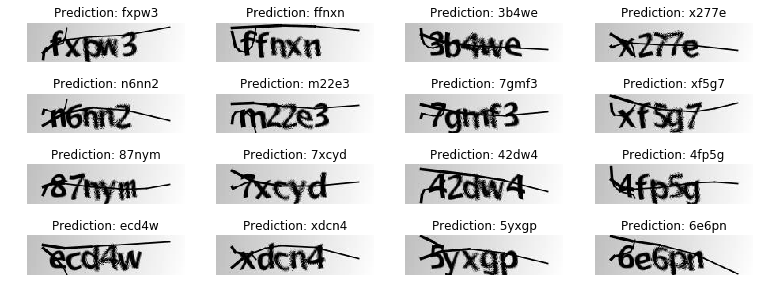

In [31]:
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    # Use greedy search. For complex tasks, you can use beam search
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][
        :, :5
    ]
    # Iterate over the results and get back the text
    output_text = []
    for res in results:
        res = tf.strings.reduce_join(num_to_char(res)).numpy().decode("utf-8")
        output_text.append(res)
    return output_text


#  Let's check results on some validation samples
for batch in validation_dataset.take(1):
    batch_images = batch["image"]
    batch_labels = batch["label"]

    preds = prediction_model.predict(batch_images)
    pred_texts = decode_batch_predictions(preds)

    orig_texts = []
    for label in batch_labels:
        label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
        orig_texts.append(label)

    _, ax = plt.subplots(4, 4, figsize=(13, 5))
    
    
    for i in range(len(pred_texts)):
        img = (batch_images[i, :, :, 0] * 255).numpy().astype(np.uint8)
        
        title = f"Prediction: {pred_texts[i]}"
        ax[i // 4, i % 4].imshow(img.T, cmap="gray")
        ax[i // 4, i % 4].set_title(title)
        ax[i // 4 ,i % 4].axis("off")
plt.savefig('prediction.jpg')
plt.show()


# Hyper parameter tunning

In [34]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
import time

In [35]:
LOG_dir = f"{int(time.time())}"

In [36]:
#CRNN model
def CRNN(hp):
    # Inputs to the model
    input_img = layers.Input(shape=(img_width, img_height, 1), name="image", dtype="float32")
    labels = layers.Input(name="label", shape=(None,), dtype="float32")

    # First conv block
    x = layers.Conv2D(32, 
                      (3, 3), 
                      activation="relu", 
                      kernel_initializer="he_normal", 
                      padding="same",
                      name="Conv1")(input_img)
    
    x = layers.MaxPooling2D((2, 2), name="pool1")(x)

    # identify how many other CNN layers needed to optimize val_loss
    for i in range(hp.Int("num_layer", 1, 3)):
        x = layers.Conv2D(hp.Int(f"layer__{i}", 32, 128, 16),
                          (3, 3),
                          activation="relu",
                          kernel_initializer="he_normal",
                          padding="same",
                          )(x)
    x = layers.MaxPooling2D((2, 2), name="pool2")(x)

    # We have used two max pool with pool size and strides 2.
    # Hence, downsampled feature maps are 4x smaller. The number of
    # filters in the last layer is 64. Reshape accordingly before
    # passing the output to the RNN part of the model
    new_shape = ((img_width // 4), (img_height // 4) * x.shape[-1])
    x = layers.Reshape(target_shape=new_shape, name="reshape")(x)
    x = layers.Dense(64, activation="relu", name="dense1")(x)
    x = layers.Dropout(hp.Float("Dropout", 0.1, 0.5, 0.1))(x)

    # RNNs
    x = layers.Bidirectional(layers.LSTM(hp.Int("first_LSTM", 32, 128, 32),
                                         return_sequences=True, 
                                         dropout=0.25))(x)
    x = layers.Bidirectional(layers.LSTM(hp.Int("first_LSTM", 32, 128, 32), 
                                         return_sequences=True, 
                                         dropout=0.25))(x)
    
   

    # Output layer
    x = layers.Dense(len(Vocab) + 1, activation="softmax", name="dense2")(x)

    # Add CTC layer for calculating CTC loss at each step
    output = CTCLayer(name="ctc_loss")(labels, x)

    # Define the model
    model = keras.models.Model(inputs=[input_img, labels], outputs=output, name="ocr_model_v1")
    # Optimizer
    opt = keras.optimizers.Adam(lr=hp.Float(0.01, 0.05, 0.01))
    # Compile the model and return
    model.compile(optimizer=opt)
    return model




In [42]:
tuner = RandomSearch(CRNN,
                    objective = "val_loss",
                    max_trials = 6,
                    executions_per_trial = 2,
                    directory = LOG_dir
                    ) 

In [43]:
tuner.search_space_summary()

Search space summary
Default search space size: 5
num_layer (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': None}
layer__0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 16, 'sampling': None}
Dropout (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': 0.1, 'sampling': None}
first_LSTM (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': None}
0.01 (Float)
{'default': 0.05, 'conditions': [], 'min_value': 0.05, 'max_value': 0.01, 'step': None, 'sampling': None}


In [44]:
tuner.search(train_dataset, validation_data=validation_dataset, epochs = 50)

Trial 2 Complete [00h 58m 13s]
val_loss: 15.96800947189331

Best val_loss So Far: 15.794085025787354
Total elapsed time: 01h 48m 16s

Search: Running Trial #3

Hyperparameter    |Value             |Best Value So Far 
num_layer         |3                 |2                 
layer__0          |80                |48                
Dropout           |0.2               |0.3               
first_LSTM        |32                |64                
0.01              |0.027556          |0.012417          
layer__1          |96                |32                

Epoch 1/50
47/47 [==============================] - 47s 888ms/step - loss: 28.2570 - val_loss: 16.4404
Epoch 2/50
47/47 [==============================] - 40s 858ms/step - loss: 16.5330 - val_loss: 16.4069
Epoch 3/50
47/47 [==============================] - 40s 864ms/step - loss: 16.5008 - val_loss: 16.4057
Epoch 4/50
47/47 [==============================] - 40s 858ms/step - loss: 16.4913 - val_loss: 16.4722
Epoch 5/50
47/47 [==========

KeyboardInterrupt: 